# 数据探索练习

泰坦尼克号幸存者预测分析中提供的数据文件中包括泰坦尼克号的乘客数据，本节通过数据来练习一下数据探索使用方法。

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

泰坦尼克号幸存者预测分析比赛提供的数据集有两个`train.csv`和`test.csv`，它们都是csv格式文本文件, 即逗号分隔符文件。可以使用 Pandas 提供的`read_csv()`来读取csv文件（在下一章会介绍）：

In [4]:
import os

trainfile = os.path.join('..', 'data', 'titanic', 'train.csv')
df = pd.read_csv(trainfile)

## 查看数据集基本信息

读取 `train.csv` 文件返回的是`DataFrame`对象：

In [8]:
type(df)

pandas.core.frame.DataFrame

使用`info()`方法，查看数据集的概况：

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可知该数据集中共有12列，对应的列名以及含义如下：
- `PassengerId`：乘客ID
- `Survived`：是否生存
- `Pclass`：客舱等级
- `Name`：乘客姓名
- `Sex`：性别
- `Age`：年龄
- `SibSp`：在船兄弟姐妹数/配偶数
- `Parch`：在船父母数/子女数
- `Ticket`：船票编号
- `Fare`：船票价格
- `Cabin`：客舱号
- `Embarked`：登船港口

数据集大小为891个数据行，在年龄（age）、客舱号（Cabin）与登船港口（Embarked）列中存在空值。

使用`df.head()`等方法查看数据集，获得大概印象：

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C


根据各列的含义以及内容可以看出，把各列分为如下类型：
- 类别数据：`PassengerId`, `Survived`, `Sex`, `Ticket`, `Cabin`, `Embarked`；
- 数值数据
    - 离散数据：`SibSp`, `Parch`
    - 连续数据：`Age`, `Fare`
- 有序数据：`Pclass`    
- 文本数据：`Name`；

## 数据统计

对数据集有了整体了解后，还要了解数据集的每个特征，也就是每列数据的数据分布情况。NumPy和Pandas都提供了大量的统计函数或方法。不过在进行统计前，需要了解每列数据的类型，数值型、类别型还是有序数据？

从前面信息可知，这个数据集中的类别型数据有：
- `Survived`,是否生存
- `Sex`, 性别
- `Pclass`,客舱等级

在Pandas中，可以使用`Series`对象的`unique()`方法，获得数据。

In [ ]:
print(df['Survived'].unique())
print(df['Sex'].unique())
print(df['Pclass'].unique())

根据以上结果可知：
- `Survived`列中只有两个数字，实际上1表示生还，0表示没有生还；
- `Sex`列表示性别，也就是只有男与女的差别；
- `Pclass`列表示客舱等级，分为1等、2等和3等。是有序数据类型，自然也是类别数据；

可以遍历`DataFrame`对象所有列，获得每列的数字：

In [ ]:
for col in df.columns:
    n = len(df[col].unique())
    print('{0}: {1}'.format(col, n))

尽管`SibSp`（在船兄弟姐妹数/配偶数）与`Parch`（在船父母数/子女数）列的结果也很少，但他们是离散数值类型数据。

### 描述性统计

使用`describe()`来快捷获得这些统计结果：

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 频数统计

对于类别数据来说，描述性统计意义并不大。而是使用频数统计，也就是来统计某一类别出现的频次。在Pandas中，可以使用`Series`对象的`value_counts()`方法来实现频数统计。

下面分别给出Survived（是否生还），Pclass（客舱等级），Sex（性别）的频数统计：

In [ ]:
df['Survived'].value_counts()

In [ ]:
df['Sex'].value_counts()

In [ ]:
df['Pclass'].value_counts()

也可以用于数值型数据，不过用在离散数据意义才更大，例如`SibSp`、`Parch`列：

In [ ]:
df['SibSp'].value_counts()

In [ ]:
df['Parch'].value_counts()

从上可知，泰坦尼克号上的乘客单身居多。

## 可视化

一图胜千言。尽管用统计方法可以获得数据分布的一些情况，不过通过图形可以更直观地描述数据情况。

对于数值型数据，常常用直方图来描述其数据分布；而对于类别型数据，则常用柱状图或饼图来说明频次统计结果。

下面用`Matplotlib`包，分别画出`Age`（年纪）与`Fare`（船票价格）的直方图：

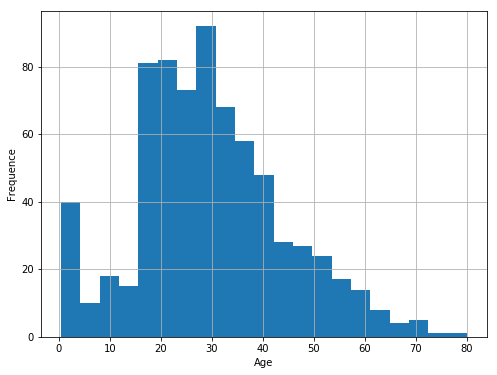

In [14]:
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=21)
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

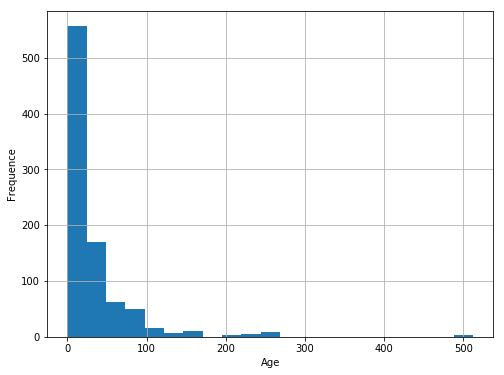

In [15]:
plt.figure(figsize=(8, 6))
df['Fare'].hist(bins=21)
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

下面使用饼状图来画出Survived（是否生还）的频数分析结果：

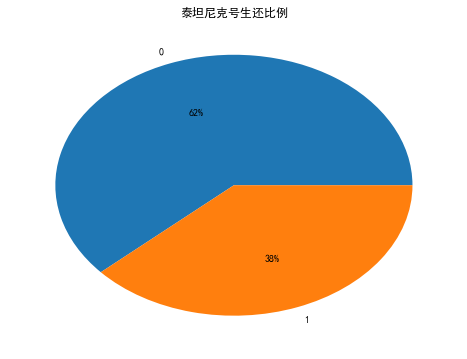

In [16]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False ## 设置正常显示符号

freqs = df['Survived'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(freqs, labels=freqs.index, autopct='%1.0f%%')
plt.title('泰坦尼克号生还比例') 
plt.show()

下面使用柱状图来画出Pclass（客舱等级）的频数分析：

3    491
1    216
2    184
Name: Pclass, dtype: int64


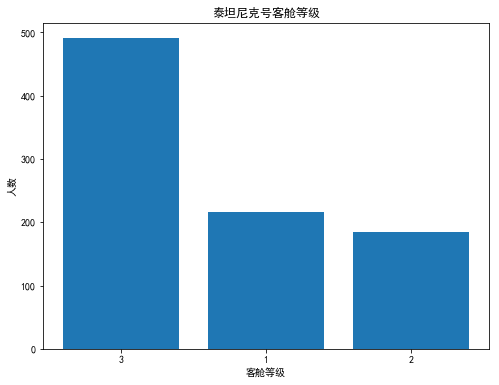

In [17]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False ## 设置正常显示符号

freqs = df['Pclass'].value_counts()
print(freqs)
X = np.arange(len(freqs))+1

plt.figure(figsize = (8, 6))
plt.bar(X, freqs)
plt.title('泰坦尼克号客舱等级') 
plt.xticks([1, 2, 3], freqs.index)
plt.xlabel('客舱等级') 
plt.ylabel('人数') 
plt.show()